In [1]:
%pylab
%matplotlib inline

import scipy as sp
import librosa
import sounddevice

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'C://Users/ghage/Downloads/beat_detection_samples/bensound-jazzyfrenchy.mp3'

In [3]:
song, fs = librosa.load(path)

C:\Users\ghage\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [45]:
sfft = sp.fft.fft(song)
sfft.shape

(2309596,)

In [57]:
sxx = sfft*sfft.conjugate()
isxx = sp.fft.ifft(sxx)
isxx.shape

(2309596,)

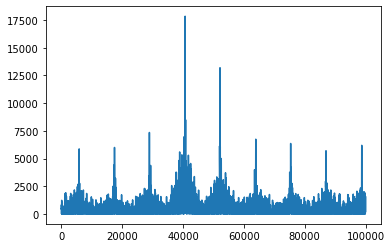

In [58]:
plt.plot(abs(isxx)[len(isxx)//2:len(isxx)//2+100000])

In [78]:
con = np.convolve(abs(isxx), np.ones(5000)/5000, mode='valid')

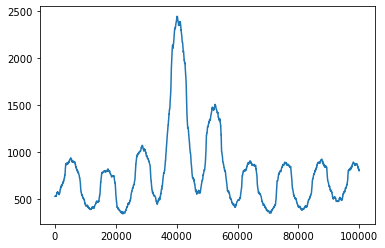

In [79]:
plt.plot(abs(con)[len(con)//2:len(con)//2+100000])

In [69]:
def median_smoothing(arr, n):
    med_x = np.median(arr)
    x = np.concatenate((med_x*np.ones(n//2), arr, med_x*np.ones(n//2)))
    meds = np.array([np.median(x[t:t+n]) + sp.stats.median_abs_deviation(x[t:t+n]) for t in range(len(arr))])
    
    return np.where(arr > meds, arr, 0)

In [80]:
med = median_smoothing(abs(isxx), 10000)

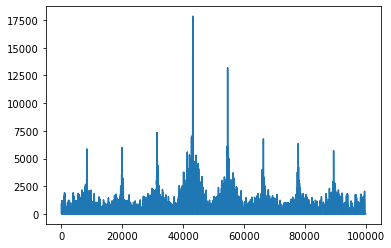

In [81]:
plt.plot(med[len(con)//2:len(con)//2+100000])

In [27]:
dsong = sp.signal.decimate(song, 10)
med = sp.ndimage.median_filter(dsong, fs//100)

In [4]:
_, _, s = sp.signal.stft(song, fs, nperseg=int(0.03*fs), noverlap=int(0.01*fs))
s.shape

(331, 5239)

In [5]:
sxx = s*s.conjugate()

<ipython-input-9-2c99c139a3e3>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(abs(sxx)))


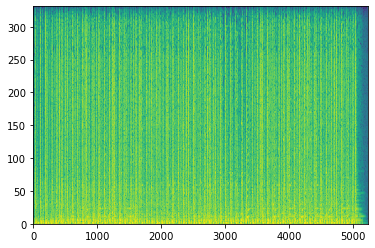

In [9]:
plt.pcolormesh(np.log(abs(sxx)))

In [12]:
_, isxx = sp.signal.istft(sxx, fs, nperseg=int(0.03*fs), noverlap=int(0.01*fs))
isxx.shape

(2309959,)

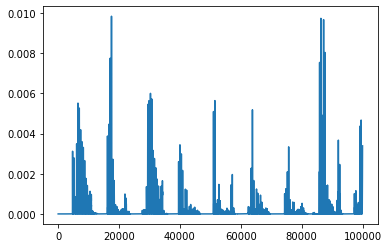

In [16]:
plt.plot(isxx[100000:200000]**2)

In [30]:
_, _, s = sp.signal.stft(med, fs/10, nperseg=int(0.003*fs), noverlap=int(0.001*fs))
s.shape

(34, 5251)

<ipython-input-35-d45a3d0ad0a2>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(abs(s)))


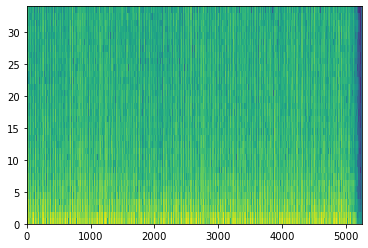

In [35]:
plt.pcolormesh(np.log(abs(s)))

In [36]:
sxx = s*s.conjugate()

<ipython-input-37-2c99c139a3e3>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(abs(sxx)))


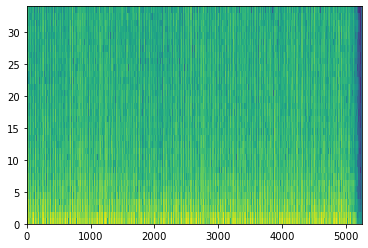

In [37]:
plt.pcolormesh(np.log(abs(sxx)))

In [39]:
_, isxx = sp.signal.istft(sxx, fs, nperseg=int(0.003*fs), noverlap=int(0.001*fs))
isxx.shape

(231000,)

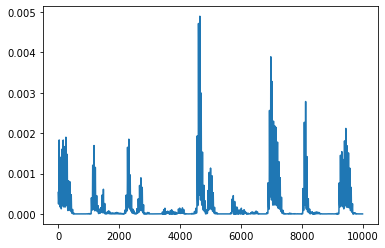

In [42]:
plt.plot(abs(isxx)[100000:110000])